# Perceptron: Intuition, Explanation, and Math

The **perceptron** is one of the earliest and simplest types of artificial neurons, introduced by Frank Rosenblatt in 1958. It is a **binary linear classifier**, meaning it tries to separate two classes using a linear decision boundary.

---

## **1. Intuition**

Imagine you have points in a 2D plane representing two classes (e.g., blue circles and red triangles). The perceptron’s goal is to find a straight line (in higher dimensions, a hyperplane) that separates these two classes.

- Each feature is given a **weight** that reflects its importance in the classification.
- The perceptron takes a **weighted sum** of the inputs, adds a bias, and passes the result through an **activation function** (a step function).
- If the sum is greater than a threshold, it predicts one class; otherwise, it predicts the other.

In essence, the perceptron is like a "gate" that decides which side of the decision boundary a point lies on.

---

## **2. Mathematical Formulation**

Let:
- $\mathbf{x} = [x_1, x_2, \dots, x_n]$ be the input feature vector.
- $\mathbf{w} = [w_1, w_2, \dots, w_n]$ be the weights.
- $b$ be the bias term.

The perceptron computes:

$$
z = \mathbf{w}^\top \mathbf{x} + b
$$

The output is given by:

$$
\hat{y} = 
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$

This step function is the activation function:

$$
\phi(z) =
\begin{cases}
1 & z \ge 0 \\
0 & z < 0
\end{cases}
$$

---

## **3. Learning Algorithm**

The perceptron learning rule adjusts the weights iteratively:

Given a training set $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^m$:
1. Initialize weights $\mathbf{w}$ and bias $b$ (often to zeros or small random values).
2. For each training example:
   - Predict $\hat{y}^{(i)} = \phi(\mathbf{w}^\top \mathbf{x}^{(i)} + b)$.
   - Update weights and bias if prediction is wrong:

$$
\mathbf{w} \leftarrow \mathbf{w} + \eta \cdot \left( y^{(i)} - \hat{y}^{(i)} \right) \cdot \mathbf{x}^{(i)}
$$

$$
b \leftarrow b + \eta \cdot \left( y^{(i)} - \hat{y}^{(i)} \right)
$$

Here:
- $\eta$ = learning rate (controls step size).
- $(y^{(i)} - \hat{y}^{(i)})$ = prediction error.

---

## 4. Why is this a Gradient Update?

The perceptron loss (also called the perceptron criterion) is:

$$
L(\mathbf{w}, b) = - \sum_{i \in \mathcal{M}} y_i (\mathbf{w}^\top \mathbf{x}_i + b)
$$

Where:
- $\mathcal{M}$ is the set of misclassified points.

For a single misclassified sample $(\mathbf{x}_i, y_i)$, the loss term is:

$$
\ell_i(\mathbf{w}, b) = - y_i (\mathbf{w}^\top \mathbf{x}_i + b)
$$

The gradient of $\ell_i$ w.r.t. $\mathbf{w}$ and $b$ is:

$$
\nabla_{\mathbf{w}} \ell_i = - y_i \mathbf{x}_i
$$
$$
\nabla_b \ell_i = - y_i
$$

A **stochastic gradient descent (SGD)** step is:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \, \nabla_{\mathbf{w}} \ell_i
= \mathbf{w} + \eta \, y_i \mathbf{x}_i
$$

$$
b \leftarrow b - \eta \, \nabla_b \ell_i
= b + \eta \, y_i
$$

This is exactly the perceptron update rule — so the perceptron is **performing SGD** on the perceptron loss function.

---

## **5. Why It's Non-Parametric or Not?**

The perceptron **is parametric** because it has a fixed number of parameters (weights + bias), independent of the dataset size.  
However, unlike KNN, the perceptron **does not store training examples** after training—it only keeps the learned parameters.

---

## **6. Limitations and Intuition**

- **Strength**: Fast to train and simple to implement.
- **Limitation**: Can only classify linearly separable data. If the data is not separable, the perceptron will not converge.
- **Geometric View**: The perceptron tries to find a hyperplane $\mathbf{w}^\top \mathbf{x} + b = 0$ that separates the classes.

---

## **7. Visualization**

![Perceptron Decision Boundary](https://upload.wikimedia.org/wikipedia/commons/8/8a/Perceptron_example.svg)

In this figure:
- The line is the decision boundary.
- The perceptron updates the boundary iteratively until it correctly classifies all points (if possible).

---

**Key Takeaway**:  
The perceptron is a foundational building block for neural networks. While it is limited to linear separability, it introduces the **core ideas of weights, bias, and learning through iterative updates**, which extend directly into modern deep learning.


# Application to Titanic Dataset
- Goal is to predict whether someone survived the sinking of the Titanic based on a slew of variables, including demographic and titanic-class related features.
## EDA

In [7]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load dataset
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


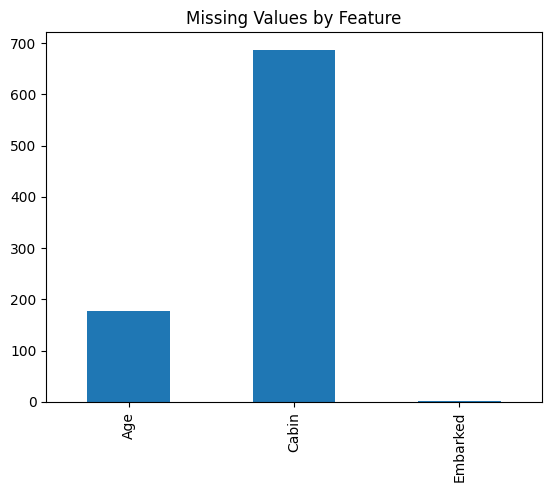

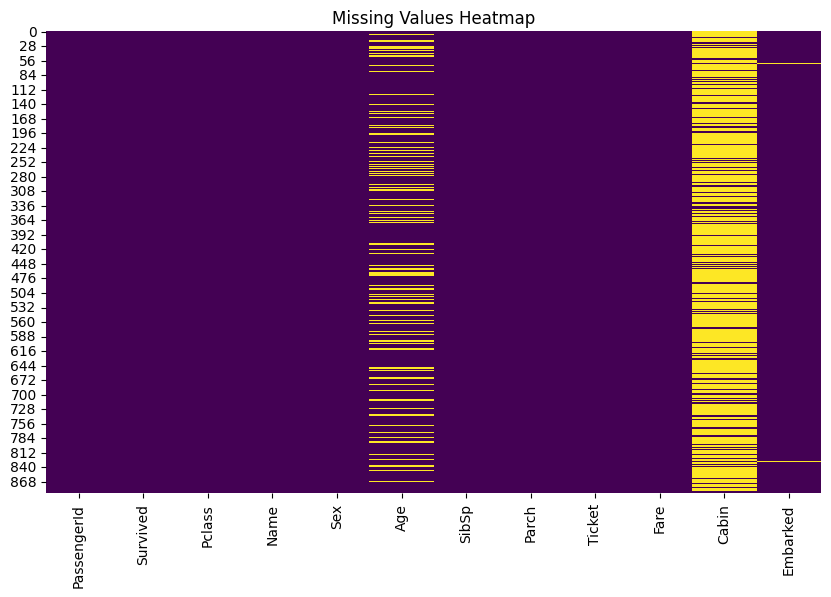

In [8]:
## Visualize and count missing values by feature
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar', title='Missing Values by Feature')
plt.show()

# Missing values heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


It seems that cabin has a majority of null values, so we will drop it. Age can be a helpful predictor, so we will fill these values. We will use the mean. 

In [9]:
# Preprocessing
# Drop 'Cabin' due to high missing values
data.drop(columns=['Cabin'], inplace=True)
# Fill missing 'Age' with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Drop name, ticket, passenger id, and embarked because they are not useful for prediction
data.drop(columns=['Name', 'Ticket', 'PassengerId', 'Embarked'], inplace=True)

# Convert categorical variables (Sex) to numerical
# Convert 'male' to 1 and 'female' to 0
data['Sex'] = [1 if sex == 'male' else 0 for sex in data['Sex']]

# View the cleaned dataset
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


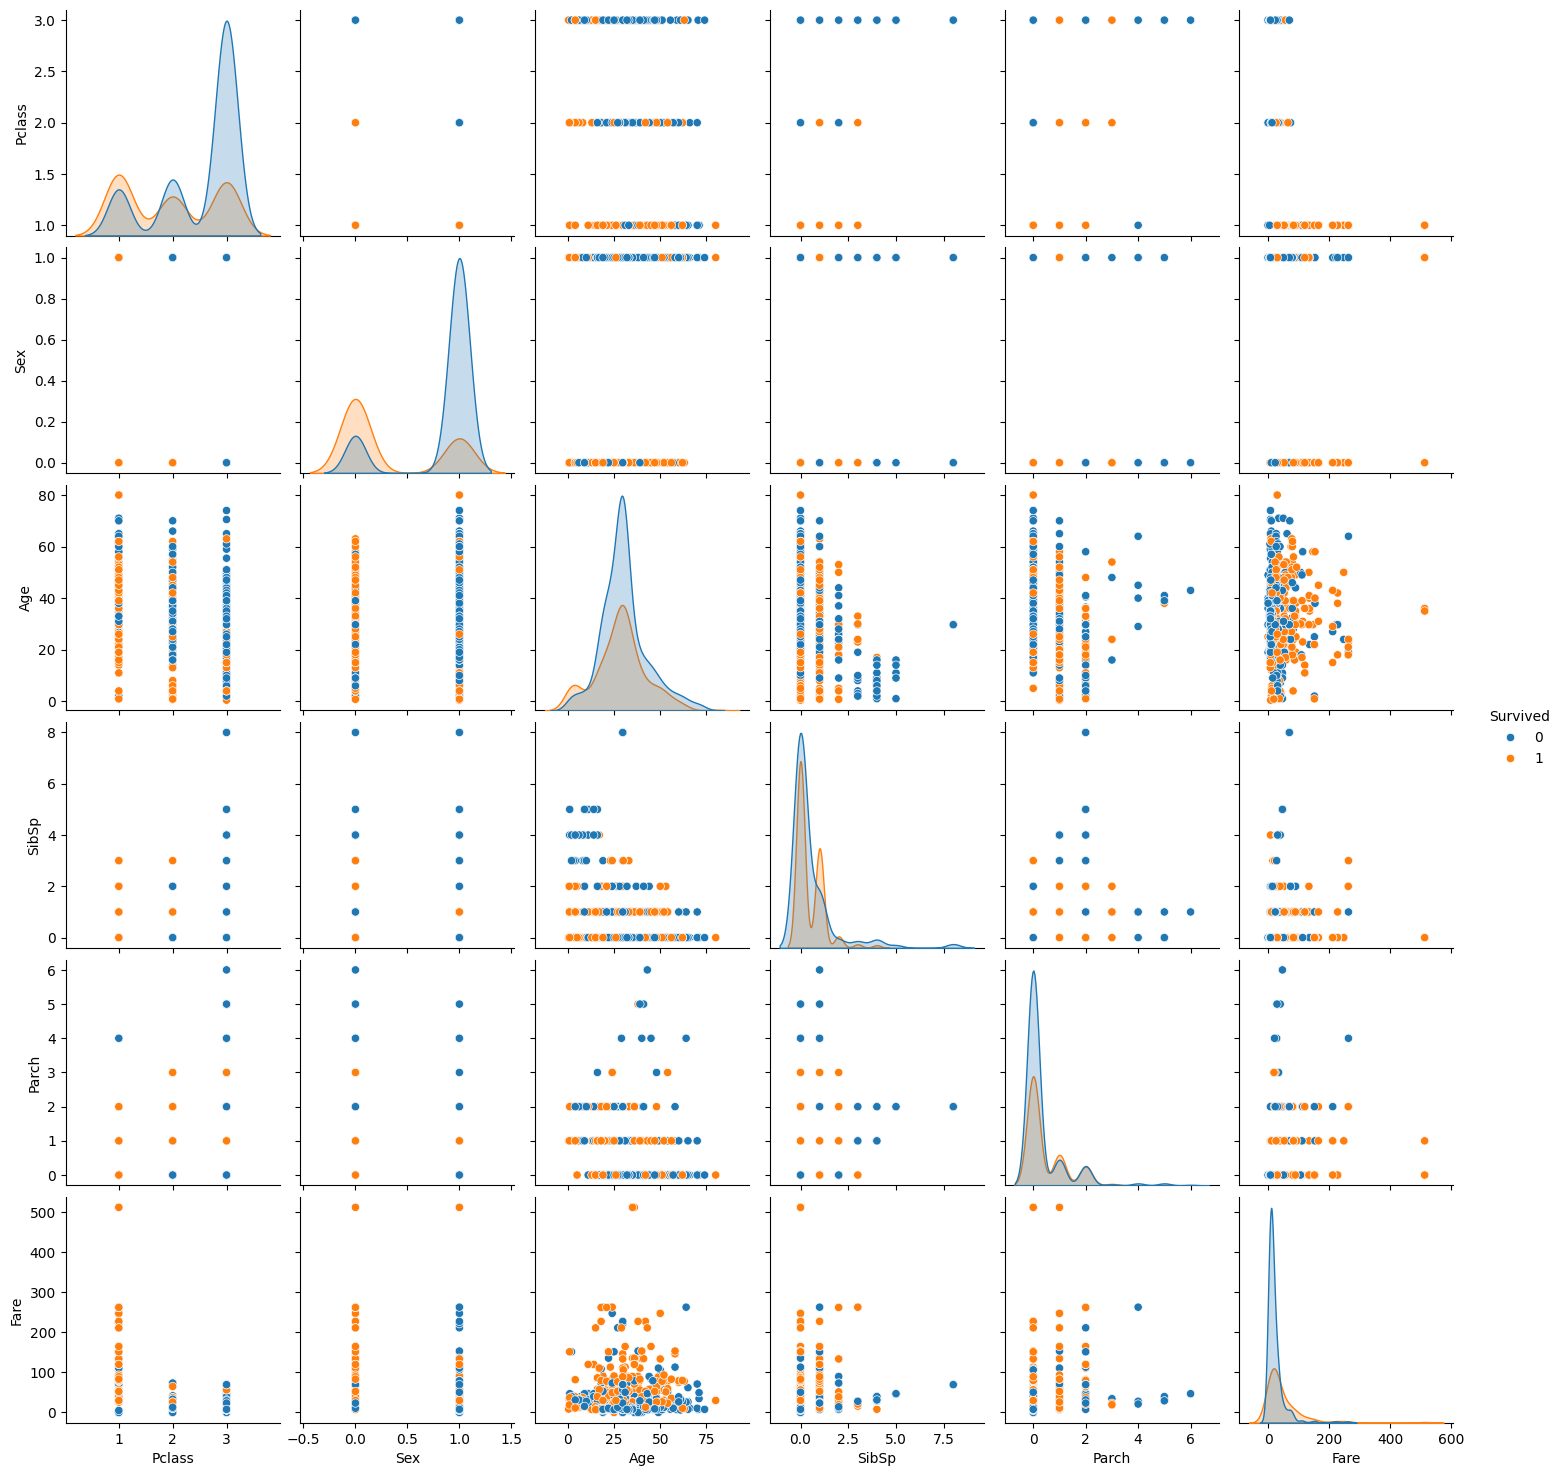

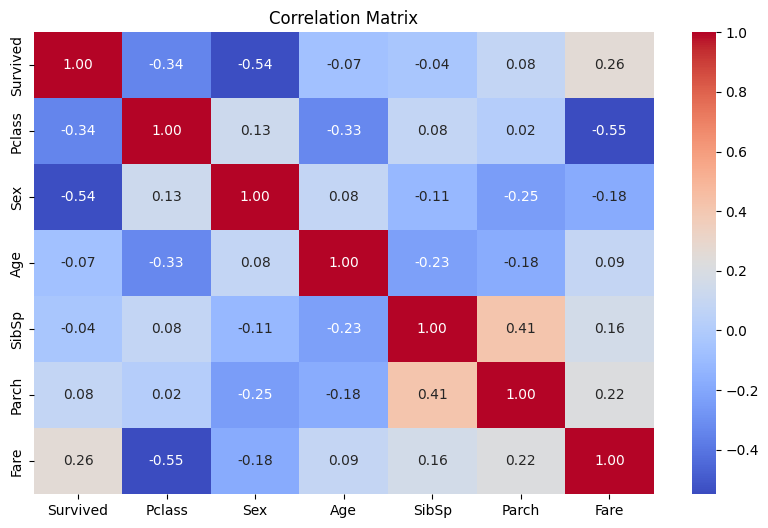

In [10]:
## Pairplot and correlation matrix
sns.pairplot(data, hue='Survived')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

None of the predictors are extremely correlated with each other nor to the 'survived' variable. We do see that women are more likely to have survived as well as more premium class types (i.e. 1 or 2). We will drop SibSp because it doesn't provide much value and is highly related to Parch.

In [11]:
# drop 'SibSp' as it is highly related to 'Parch'
data.drop(columns=['SibSp'], inplace=True)

## Perceptron from scratch
1. Training and evaluation
2. Comparison to Sklearn Results

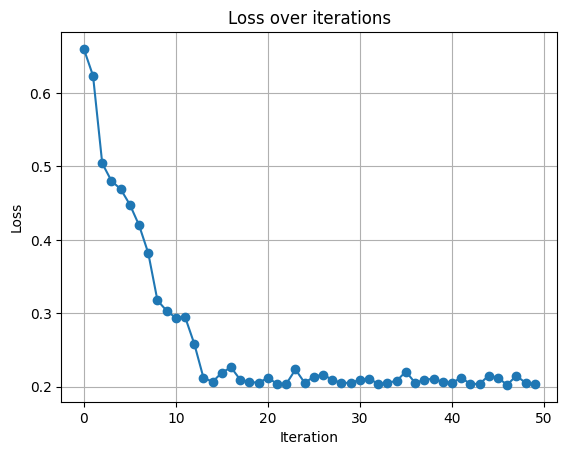

In [40]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss = []
        np.random.seed(42)  # For reproducibility

    def calculate_loss(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, 0)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
            # Calculate and store loss
            y_predicted = self.predict(X)
            loss = self.calculate_loss(y, y_predicted)
            self.loss.append(loss)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
    def plot_loss(self):
        plt.plot(range(len(self.loss)), self.loss, marker='o')
        plt.title('Loss over iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.grid()
        plt.show()
    
    def confusion_matrix(self, X, y):
        y_pred = self.predict(X)
        return pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
    
# Split the dataset into features and target variable
X = data.drop('Survived', axis=1).values
y = data['Survived'].values
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Perceptron
perceptron = Perceptron(learning_rate=0.0005, n_iterations=50)
perceptron.fit(X_train, y_train)
perceptron.plot_loss()

We can see our model coverges to a minimum training loss after about 15 iterations.

Training Accuracy: 0.7963
Testing Accuracy: 0.7765
Confusion Matrix:


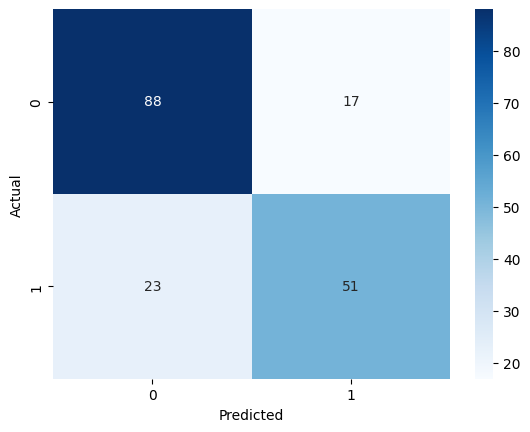

In [41]:
# Let's evaluate our model
train_accuracy = perceptron.accuracy(X_train, y_train)
test_accuracy = perceptron.accuracy(X_test, y_test)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
conf_matrix = perceptron.confusion_matrix(X_test, y_test)
print("Confusion Matrix:")
# Consuion matrix in seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [39]:
# Interpretation of weights
feature_names = data.drop('Survived', axis=1).columns
weights = perceptron.weights
for feature, weight in zip(feature_names, weights):
    print(f'Feature: {feature}, Weight: {weight:.4f}')

# Print bias
print(f'Bias: {perceptron.bias:.4f}')

Feature: Pclass, Weight: -0.0001
Feature: Sex, Weight: -0.0023
Feature: Age, Weight: 0.0001
Feature: Parch, Weight: -0.0012
Feature: Fare, Weight: 0.0002
Bias: -0.0010


## Interpretation of Perceptron Weights

The perceptron weights indicate the influence of each feature on the prediction of survival:

- **Pclass (-0.0001):** Slight negative impact; higher class values slightly decrease survival likelihood.
- **Sex (-0.0023):** Negative impact; being male reduces the likelihood of survival.
- **Age (0.0001):** Minimal positive impact; older age slightly increases survival likelihood.
- **Parch (-0.0012):** Negative impact; having more parents/children aboard reduces survival likelihood.
- **Fare (0.0002):** Positive impact; higher fare slightly increases survival likelihood.

These weights are small, suggesting weak influence from individual features in this model.

In [37]:
# Let's compare to sklearn's Perceptron
from sklearn.linear_model import Perceptron as SklearnPerceptron
sklearn_perceptron = SklearnPerceptron(max_iter=10000, tol=1e-3, random_state=43)
sklearn_perceptron.fit(X_train, y_train)
y_pred_sklearn = sklearn_perceptron.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f'Sklearn Perceptron Testing Accuracy: {sklearn_accuracy:.4f}')


Sklearn Perceptron Testing Accuracy: 0.7318


Our model performs slightly better but this may be due to randomization!

Sklearn Confusion Matrix:


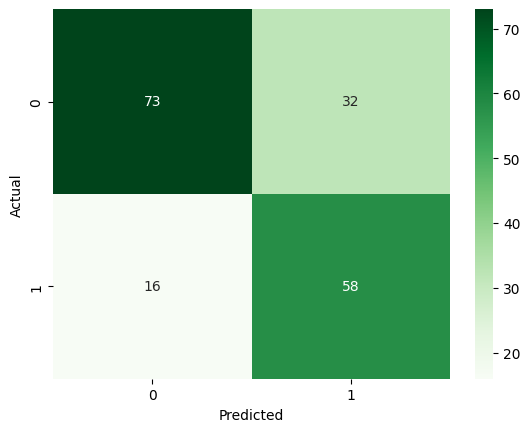

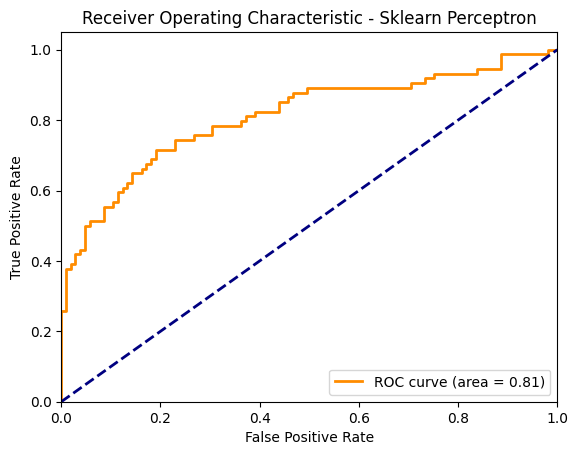

In [42]:
# Let's look at confusion matrix for sklearn's perceptron
conf_matrix_sklearn = pd.crosstab(y_test, y_pred_sklearn, rownames=['Actual'], colnames=['Predicted'])
print("Sklearn Confusion Matrix:")
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Greens')
plt.show() 

# ROC Curve for sklearn perceptron
from sklearn.metrics import roc_curve, auc
y_scores_sklearn = sklearn_perceptron.decision_function(X_test)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_scores_sklearn)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)
plt.figure()
plt.plot(fpr_sklearn, tpr_sklearn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_sklearn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Sklearn Perceptron')
plt.legend(loc="lower right")
plt.show()

Overall, solid performance.